# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


In [4]:
base_url = f"https://api.openweathermap.org/data/2.5/weather?"
api_param = f"&appid={weather_api_key}"
resp = requests.get(base_url+"q=London"+api_param).json()   
resp['weather'][0]['description']

'scattered clouds'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
base_url = f"https://api.openweathermap.org/data/2.5/weather?"
api_param = f"&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1



# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_param = f"q={city}"
    resp = requests.get(base_url+city_param+api_param).json()    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = resp['weather'][0]['description']
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # Converting max temp from Kelvins to Celsius
        city_lat = resp['coord']['lat']
        city_lng = resp['coord']['lon']
        city_max_temp = resp['main']['temp_max'] - 273.15
        city_humidity = resp['main']['humidity']
        city_clouds = resp['clouds']['all']
        city_wind = resp['wind']['speed']
        city_country = resp['sys']['country']
        city_date = resp['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | sao felix do xingu
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | alexandria
Processing Record 11 of Set 1 | iskateley
Processing Record 12 of Set 1 | uacu cungo
Processing Record 13 of Set 1 | grand-popo
Processing Record 14 of Set 1 | isle of lewis
City not found. Skipping...
Processing Record 15 of Set 1 | opuwo
Processing Record 16 of Set 1 | adam
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | vorgashor
Processing Record 20 of Set 1 | tofol
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 2

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.43,56,81,8.29,PN,1712856692
1,waitangi,-43.9535,-176.5597,16.01,95,55,3.13,NZ,1712856692
2,sao felix do xingu,-6.6447,-51.9950,29.06,85,44,0.88,BR,1712856693
3,port-aux-francais,-49.3500,70.2167,6.14,96,98,6.48,TF,1712856693
4,stanley,54.8680,-1.6985,14.29,78,20,5.66,GB,1712856615


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.43,56,81,8.29,PN,1712856692
1,waitangi,-43.9535,-176.5597,16.01,95,55,3.13,NZ,1712856692
2,sao felix do xingu,-6.6447,-51.9950,29.06,85,44,0.88,BR,1712856693
3,port-aux-francais,-49.3500,70.2167,6.14,96,98,6.48,TF,1712856693
4,stanley,54.8680,-1.6985,14.29,78,20,5.66,GB,1712856615


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

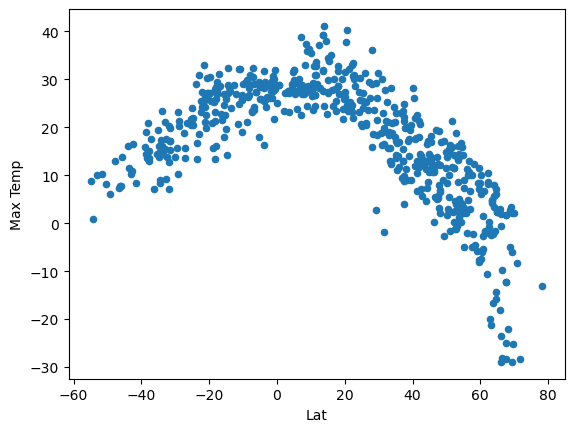

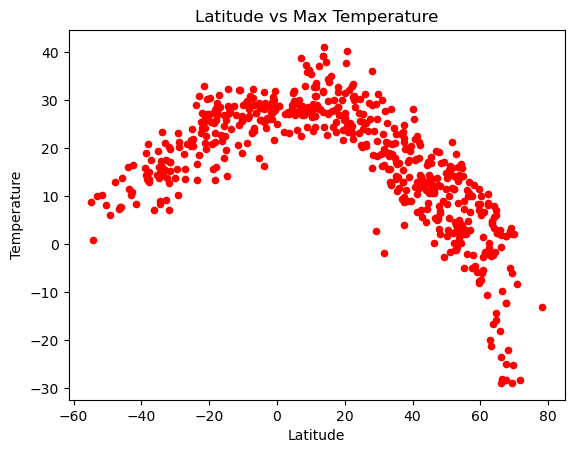

In [32]:
# Build scatter plot for latitude vs. temperature
scatter_plot = city_data_df.plot(kind="scatter",x="Lat",y="Max Temp")

# Incorporate the other graph properties
scatter_plot = city_data_df.plot(kind="scatter",
                                 x="Lat",
                                 y="Max Temp",
                                 title = "Latitude vs Max Temperature",
                                 xlabel = "Latitude",
                                 ylabel= "Temperature",
                                 color = "red"
                                 )


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

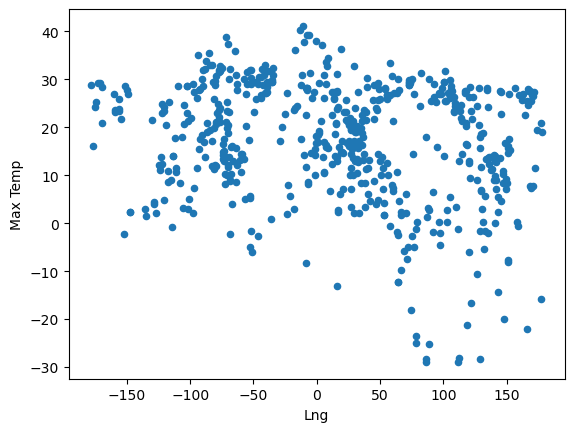

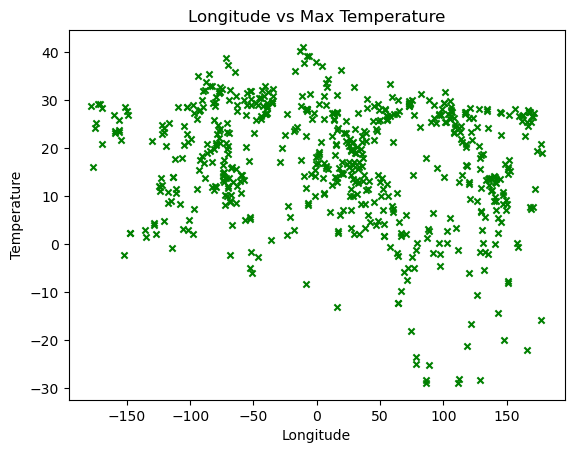

In [33]:
# Build the scatter plots for latitude vs. humidity
scatter_plot = city_data_df.plot(kind="scatter",x="Lng",y="Max Temp")

# Incorporate the other graph properties
scatter_plot = city_data_df.plot(kind="scatter",
                                 x="Lng",
                                 y="Max Temp",
                                 title = "Longitude vs Max Temperature",
                                 xlabel = "Longitude",
                                 ylabel= "Temperature",
                                 color = "green",
                                 marker = "x"
                                 )
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

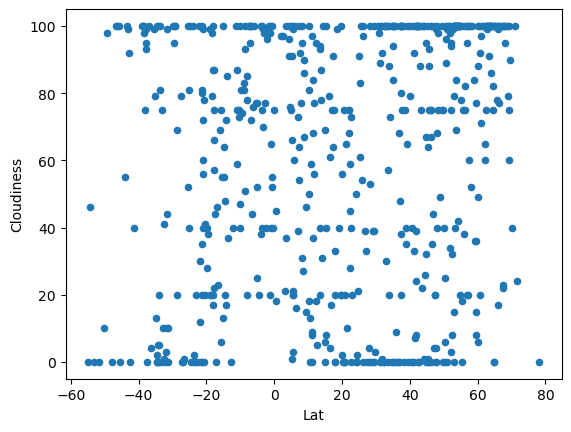

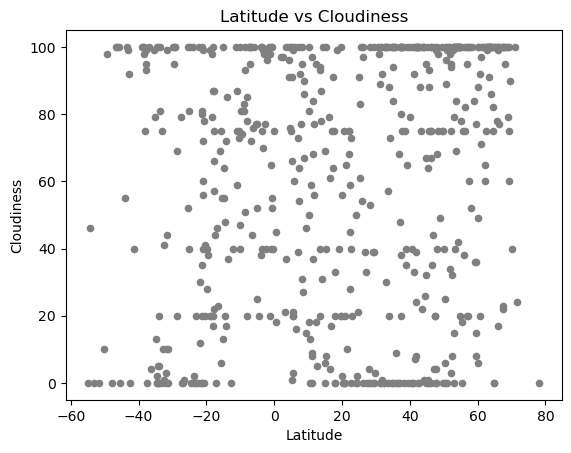

In [37]:
# Build the scatter plots for latitude vs. cloudiness
scatter_plot = city_data_df.plot(kind="scatter",x="Lat",y="Cloudiness")

# Incorporate the other graph properties
scatter_plot = city_data_df.plot(kind="scatter",
                                 x="Lat",
                                 y="Cloudiness",
                                 title = "Latitude vs Cloudiness",
                                 xlabel = "Latitude",
                                 ylabel= "Cloudiness",
                                 color = "grey"
                                 )

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

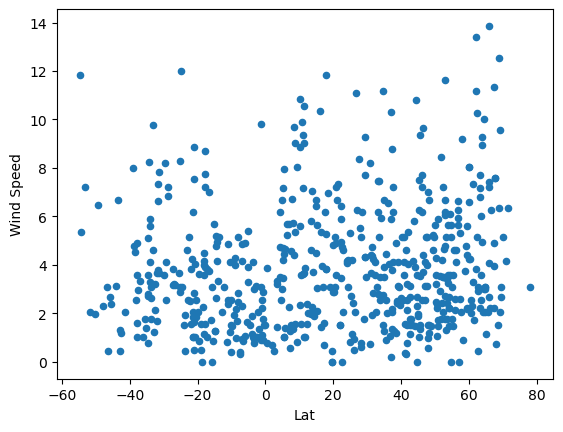

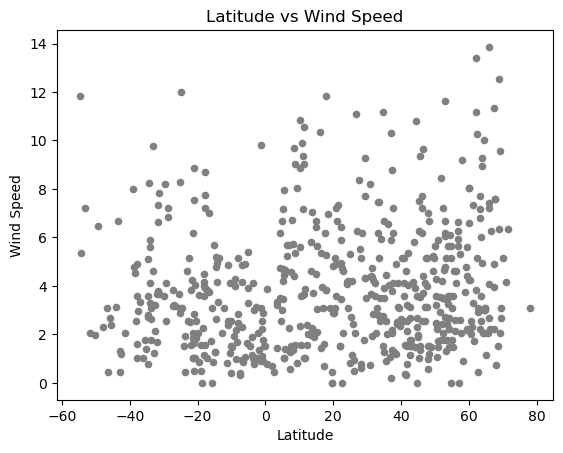

In [38]:
# Build the scatter plots for latitude vs. wind speed
scatter_plot = city_data_df.plot(kind="scatter",x="Lat",y="Wind Speed")

# Incorporate the other graph properties
scatter_plot = city_data_df.plot(kind="scatter",
                                 x="Lat",
                                 y="Wind Speed",
                                 title = "Latitude vs Wind Speed",
                                 xlabel = "Latitude",
                                 ylabel= "Wind Speed",
                                 color = "grey"
                                 )


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,stanley,54.8680,-1.6985,14.29,78,20,5.66,GB,1712856615
5,thompson,55.7435,-97.8558,2.09,69,75,4.63,CA,1712856694
7,iqaluit,63.7506,-68.5145,-2.15,68,100,2.57,CA,1712856694
9,alexandria,31.2156,29.9553,18.99,69,0,3.68,EG,1712856533
10,iskateley,67.6803,53.1512,1.68,100,100,7.60,RU,1712856695


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.43,56,81,8.29,PN,1712856692
1,waitangi,-43.9535,-176.5597,16.01,95,55,3.13,NZ,1712856692
2,sao felix do xingu,-6.6447,-51.9950,29.06,85,44,0.88,BR,1712856693
3,port-aux-francais,-49.3500,70.2167,6.14,96,98,6.48,TF,1712856693
6,luderitz,-26.6481,15.1594,21.00,55,1,3.19,NaN,1712856694


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7299099436164324


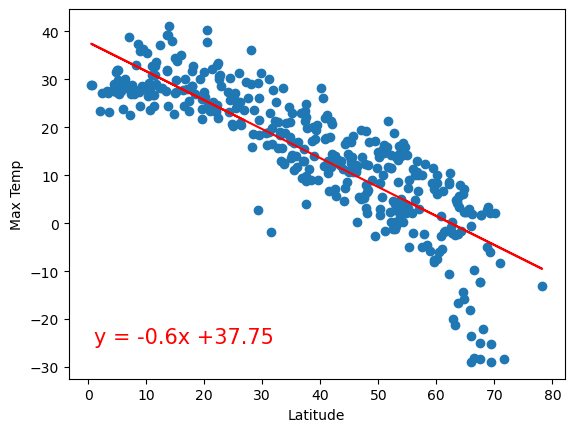

In [66]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x=northern_hemi_df["Lat"],y=northern_hemi_df["Max Temp"])
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(1,-25),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.6305509273623876


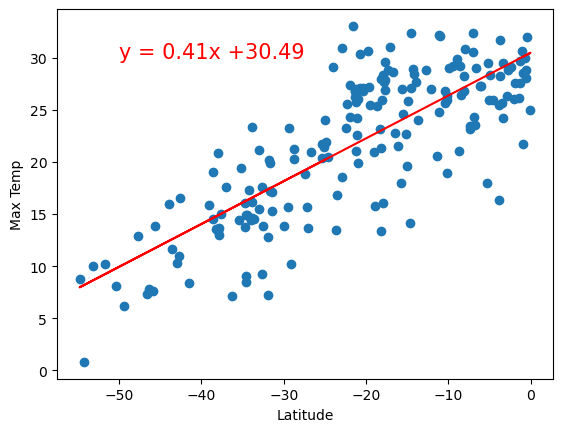

In [79]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x=southern_hemi_df["Lat"],y=southern_hemi_df["Max Temp"])
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** Based on the r-value and graph trend, it is clear that the closer Latitude is to 0, the temperature is warmer. This aligns with scientific and geographic studies that the equator is warmer than the poles.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10794542680238876


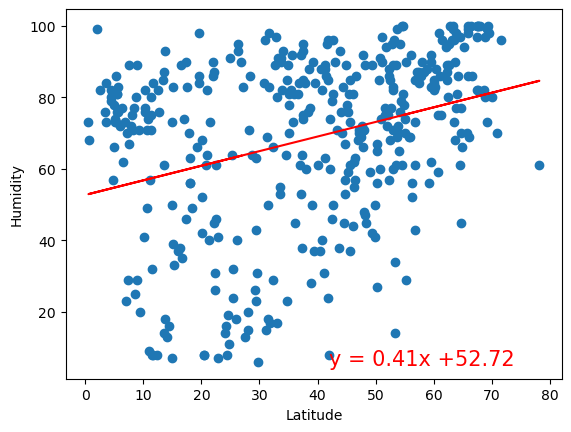

In [93]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x=northern_hemi_df["Lat"],y=northern_hemi_df["Humidity"])
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(42,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.04941599322716686


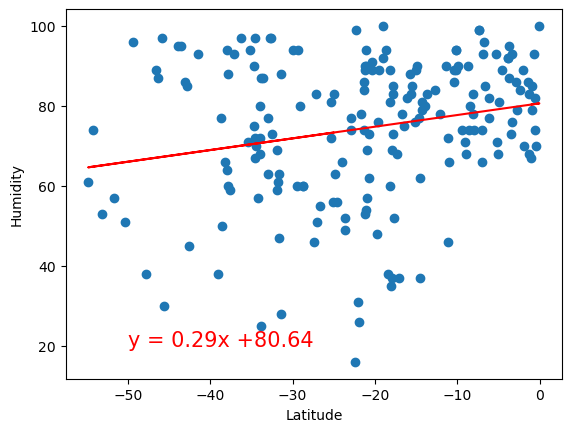

In [92]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x=southern_hemi_df["Lat"],y=southern_hemi_df["Humidity"])
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** As latitude increased, so does the humidity based on the graph trend and r-value. There is a small correlation here.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04414305860938056


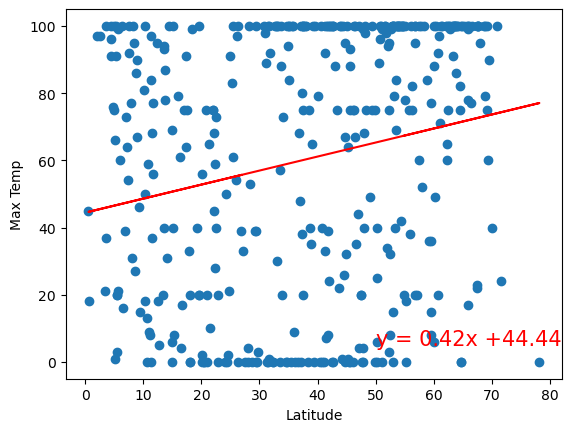

In [86]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x=northern_hemi_df["Lat"],y=northern_hemi_df["Cloudiness"])
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(50,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.04464684123769282


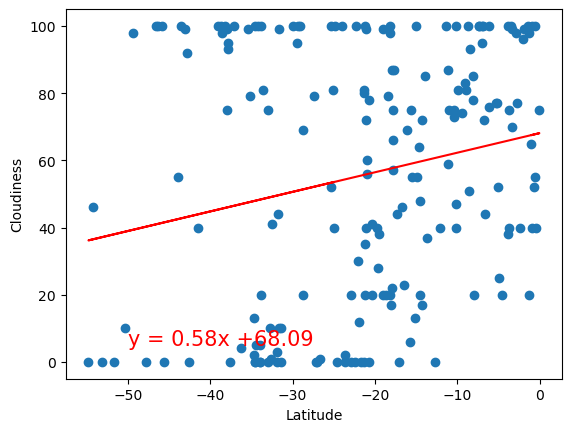

In [87]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x=southern_hemi_df["Lat"],y=southern_hemi_df["Cloudiness"])
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-50,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** As latitude increased, so does the cloduiness based on the graph trend and r-value. There is a small correlation here.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0029602811583185162


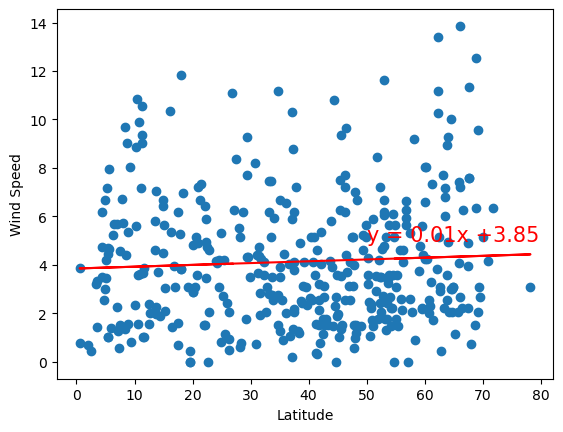

In [89]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x=northern_hemi_df["Lat"],y=northern_hemi_df["Wind Speed"])
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(50,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.06064861026423025


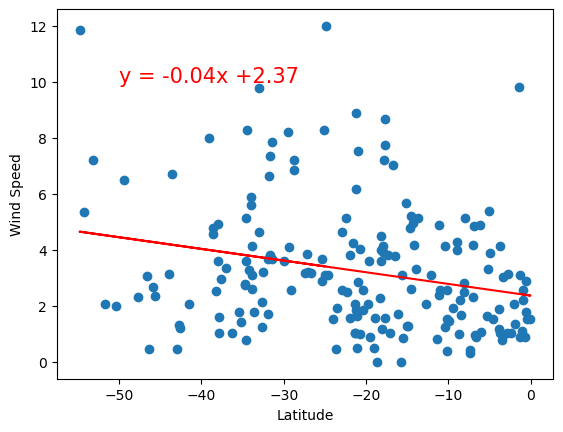

In [91]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x=southern_hemi_df["Lat"],y=southern_hemi_df["Wind Speed"])
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** While the relationship is weak, it would appear that wind speeds decrease closer to the equator and pick up as latitude furthers from 0, based on trendlines and r-value.